In [1235]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.max_rows', None)

In [1236]:
!pip install pygrowup

In [1237]:
pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [1238]:
from pygrowup import Calculator
# helpers contains optional utilities for formatting dates, etc
from pygrowup import helpers

In [1239]:
import dataframe_image as dfi

In [1240]:
filename = 'data/controles.csv'
df = pd.read_csv(filename, sep=';')

In [1241]:
df.head()

,id_individuo,sexo,peso,talla,edad_dias
0,1,F,"18,6",104.0,1964.0
1,1,F,"23,5",115.0,2615.0
2,2,M,"7,8",59.0,168.0
3,2,M,"7,8",66.0,193.0
4,3,F,"34,6",141.0,3573.0


In [1242]:
df.shape

(1161406, 5)

In [1243]:
shape_original = df.shape[0]

In [1244]:
df.info() 
# sexo tiene 187 nulos
# peso       174
# talla      114
# edad        13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161406 entries, 0 to 1161405
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id_individuo  1161406 non-null  int64  
 1   sexo          1161219 non-null  object 
 2   peso          1161232 non-null  object 
 3   talla         1161292 non-null  float64
 4   edad_dias     1161393 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 44.3+ MB


In [1245]:
# Pasar peso a float - OJO con la coma!
df['peso'] = df['peso'].replace(',', '.', regex=True)
df['peso'] = df['peso'].apply(lambda x: float(x))

In [1246]:
type(df['peso'][0])

numpy.float64

### Individuo

In [1247]:
df['id_individuo'].value_counts() #La cantidad de mediciones por individuo va de 2 a 15

148519    15
240592    15
167724    15
125839    15
138005    15
          ..
112077     2
107983     2
89552      2
87505      2
2047       2
Name: id_individuo, Length: 300000, dtype: int64

In [1248]:
print('cant. valores:', len(df['id_individuo'].value_counts())) # Se corresponde con los 300 mil individuos 
print('min:', df['id_individuo'].min())
print('max:', df['id_individuo'].max())

cant. valores: 300000
min: 1
max: 300000


### Sexo

In [1249]:
df['sexo'].unique() 
# Hacer match F-f y M-m
# Verificar si hay más info para los individuos con k y sino convertir a Nan

array(['F', 'M', nan, 'f', 'm', 'k'], dtype=object)

In [1250]:
df['sexo'].value_counts() 
# 0.5051
# 0.4948
# 

F    586580
M    574599
f        20
m        18
k         2
Name: sexo, dtype: int64

In [1251]:
df[df['sexo']=='k']

,id_individuo,sexo,peso,talla,edad_dias
364821,94319,k,52.5,161.0,4869.0
499713,129122,k,19.4,110.0,1924.0


In [1252]:
df[df['id_individuo']==94319] # es masculino

,id_individuo,sexo,peso,talla,edad_dias
364821,94319,k,52.5,161.0,4869.0
364822,94319,M,52.5,151.0,5008.0


In [1253]:
df.loc[364821, 'sexo'] = 'M'

In [1254]:
df[df['id_individuo']==129122] # es femenino

,id_individuo,sexo,peso,talla,edad_dias
499706,129122,F,7.1,70.0,378.0
499707,129122,F,8.2,76.0,532.0
499708,129122,F,13.5,89.0,776.0
499709,129122,F,10.2,86.0,994.0
499710,129122,F,14.3,96.0,1161.0
499711,129122,F,11.2,91.0,1197.0
499712,129122,F,18.4,109.0,1894.0
499713,129122,k,19.4,110.0,1924.0
499714,129122,F,21.4,116.0,2324.0


In [1255]:
df.loc[499713, 'sexo'] = 'F'

In [1256]:
df['sexo'] = df['sexo'].replace('f','F',regex=True)
df['sexo'] = df['sexo'].replace('m','M',regex=True)
df['sexo'].value_counts()

F    586601
M    574618
Name: sexo, dtype: int64

In [1257]:
df['id_individuo'].nunique()

300000

In [1258]:
df.groupby(['id_individuo', 'sexo']).count()['edad_dias'].reset_index().shape[0] 
# si hubiese solo uno para cada uno la longitud de esto debería ser igual a la cantidad de individuos únicos - y no lo es

300018

In [1259]:
df_sexo = df.groupby(['id_individuo', 'sexo']).count()['edad_dias'].reset_index()

In [1260]:
ids_indiv = df_sexo[df_sexo.duplicated(['id_individuo'])]['id_individuo']

In [1261]:
len(ids_indiv)

18

In [1262]:
df_sexo[df_sexo['id_individuo'].isin(ids_indiv)]

,id_individuo,sexo,edad_dias
31983,31984,F,1
31984,31984,M,5
40707,40707,F,1
40708,40707,M,3
58797,58796,F,1
58798,58796,M,3
60335,60333,F,1
60336,60333,M,3
95716,95713,F,1
95717,95713,M,8


In [1263]:
df[df['id_individuo'].isin(ids_indiv)]['id_individuo'].value_counts() 

95713     9
130574    7
31984     6
279796    5
174924    5
166515    5
217841    5
181006    4
157531    4
40707     4
149697    4
60333     4
58796     4
251251    4
205012    3
165815    3
157296    3
102791    2
Name: id_individuo, dtype: int64

In [1264]:
df[df['id_individuo']==102791]

,id_individuo,sexo,peso,talla,edad_dias
397539,102791,M,19.4,110.0,1881.0
397540,102791,F,33.7,136.0,3438.0


In [1265]:
df[df['id_individuo']==95713]
df.loc[370247, 'sexo'] = 'M'

In [1266]:
df[df['id_individuo']==130574]
df.loc[505323, 'sexo'] = 'F'

In [1267]:
df[df['id_individuo']==31984]
df.loc[123285, 'sexo'] = 'M'

In [1268]:
df[df['id_individuo']==279796]
df.loc[1082913, 'sexo'] = 'F'

In [1269]:
df[df['id_individuo']==174924]
df.loc[677275, 'sexo'] = 'F'

In [1270]:
df[df['id_individuo']==166515]
df.loc[644583, 'sexo'] = 'F'

In [1271]:
df[df['id_individuo']==217841]
df.loc[843440, 'sexo'] = 'F'

In [1272]:
df[df['id_individuo']==181006]
df.loc[701127, 'sexo'] = 'F'

In [1273]:
df[df['id_individuo']==157531]
df.loc[609817, 'sexo'] = 'M'

In [1274]:
df[df['id_individuo']==40707]
df.loc[156995, 'sexo'] = 'M'

In [1275]:
df[df['id_individuo']==149697]
df.loc[579273, 'sexo'] = 'F'

In [1276]:
df[df['id_individuo']==60333]
df.loc[232917, 'sexo'] = 'M'

In [1277]:
df[df['id_individuo']==58796]
df.loc[226892, 'sexo'] = 'M'

In [1278]:
df[df['id_individuo']==251251]
df.loc[972768, 'sexo'] = 'M'

In [1279]:
df[df['id_individuo']==205012]
df.loc[794042, 'sexo'] = 'M'

In [1280]:
df[df['id_individuo']==165815]
df.loc[641996, 'sexo'] = 'M'

In [1281]:
df[df['id_individuo']==157296]
df.loc[608886, 'sexo'] = 'M'

In [1282]:
print('cant. nulos:', df[df['sexo'].isnull()].shape[0])
df[df['sexo'].isnull()]

cant. nulos: 187


,id_individuo,sexo,peso,talla,edad_dias
1844,492,NaN,66.0,169.0,6705.0
15186,3895,NaN,14.3,100.0,1519.0
17158,4398,NaN,7.3,69.0,197.0
26113,6733,NaN,5.8,61.0,178.0
32343,8377,NaN,10.7,76.0,367.0
...,...,...,...,...,...
1128570,291529,NaN,10.0,74.0,225.0
1137707,293872,NaN,7.9,71.0,336.0
1140867,294732,NaN,26.8,120.0,3021.0
1143890,295513,NaN,4.8,57.0,110.0


In [1283]:
#df.dropna(subset=['sexo'], inplace=True)

### Edad (días)

In [1284]:
print(df['edad_dias'].min()) # Hasta que edad es válido ??? 19
print(df['edad_dias'].max())
# 7304 días - 20 años

4.0
7304.0


In [1285]:
print('cant. nulos:', df[df['edad_dias'].isnull()].shape[0])
df[df['edad_dias'].isnull()]

cant. nulos: 13


,id_individuo,sexo,peso,talla,edad_dias
23094,5935,F,31.4,58.0,NaN
67648,17658,M,20.6,114.0,NaN
73241,19111,F,13.3,98.0,NaN
141877,36793,M,10.4,80.0,NaN
187290,48523,F,3.9,50.0,NaN
350939,90758,F,3.1,49.0,NaN
351487,90903,M,8.5,65.0,NaN
583484,150786,M,10.3,77.0,NaN
651387,168261,F,14.6,95.0,NaN
723246,186693,M,11.5,79.0,NaN


In [1286]:
#df.dropna(subset=['edad_dias'], inplace=True)

In [1287]:
df['edad_dias'].describe([.01, .05, .10, .25, .5, .75, .90, .95, .99]) 
# hasta el tercer cuartil cubre 6 años de edad
# ver percentiles 90-95-99

count    1.161393e+06
mean     1.669827e+03
std      1.625521e+03
min      4.000000e+00
1%       2.400000e+01
5%       7.000000e+01
10%      1.380000e+02
25%      3.720000e+02
50%      1.134000e+03
75%      2.469000e+03
90%      4.205000e+03
95%      5.277000e+03
99%      6.580000e+03
max      7.304000e+03
Name: edad_dias, dtype: float64

In [1288]:
df[df['edad_dias']>6935].shape[0]

4660

In [1289]:
(4655 * 100) / 1161406

0.40080729736199056

### Peso

In [1290]:
print(df['peso'].min()) # En qué unidad están ??? KG
print(df['peso'].max())
# Cuál serían el mínimo y máximo valor aceptable?

0.0
12597.9


In [1291]:
df[df['peso'] == 0].shape[0] 
# Hay 6 registros con peso 0

6

In [1292]:
print('cant. nulos:', df[df['peso'].isnull()].shape[0])
df[df['peso'].isnull()]

cant. nulos: 174


,id_individuo,sexo,peso,talla,edad_dias
1532,408,F,NaN,169.0,5645.0
4128,1065,M,NaN,101.0,1307.0
9086,2329,M,NaN,86.0,768.0
14746,3781,F,NaN,62.0,165.0
27901,7198,F,NaN,126.0,2282.0
...,...,...,...,...,...
1103129,284983,F,NaN,161.0,6163.0
1113606,287656,F,NaN,107.0,1465.0
1122015,289828,M,NaN,85.0,809.0
1142888,295259,F,NaN,126.0,3330.0


### Altura (talla)

In [1293]:
print(df['talla'].min()) # En qué unidad están ??? CM
print(df['talla'].max())
# Cuál serían el mínimo y máximo valor aceptable?

19.0
251.0


In [1294]:
df[df['talla']<35]

,id_individuo,sexo,peso,talla,edad_dias
15923,4076,M,8.9,30.0,341.0
20461,5273,M,13.7,34.0,564.0
28397,7335,F,22.1,22.0,2216.0
28903,7466,F,2.7,32.0,23.0
32958,8542,M,12.6,23.0,730.0
...,...,...,...,...,...
1136317,293510,M,19.4,28.0,2003.0
1137532,293828,M,8.8,22.0,403.0
1140204,294555,M,31.9,31.0,2646.0
1147984,296572,F,22.8,24.0,2790.0


In [1295]:
df[df['talla']==251]

,id_individuo,sexo,peso,talla,edad_dias
68562,17902,F,9.6,251.0,315.0


In [1296]:
print('cant. nulos:', df[df['talla'].isnull()].shape[0])
df[df['talla'].isnull()]

cant. nulos: 114


,id_individuo,sexo,peso,talla,edad_dias
389,105,F,33.7,NaN,2576.0
19368,4986,M,3.9,NaN,29.0
19736,5084,F,17.5,NaN,1503.0
21847,5615,F,49.4,NaN,4760.0
25305,6518,M,13.3,NaN,762.0
...,...,...,...,...,...
1119690,289214,M,13.1,NaN,818.0
1130327,291968,M,16.1,NaN,1588.0
1145304,295881,M,7.6,NaN,256.0
1148203,296626,M,21.6,NaN,2296.0


# Nulos

In [1297]:
df.shape[0]

1161406

In [1298]:
df.dropna(inplace=True)

In [1299]:
#df.reset_index(drop=True,inplace=True)

In [1300]:
df.shape[0]

1160918

# Unicidad
- Es la medida en que los datos son únicos, no hay duplicados (no existen dos registros que representen la misma entidad).
- Para un mismo individuo puede haber varias mediciones
- Puedo ver duplicados y puedo ver si hay más de una medición para el mismo **id_individuo** y misma **edad_dias**

### Duplicados

In [1301]:
df[df.duplicated()].shape[0]

737

In [1302]:
df_duplicados = df[df.duplicated()]
df_duplicados

,id_individuo,sexo,peso,talla,edad_dias
1445,382,M,16.1,96.0,1462.0
2240,579,F,12.1,85.0,708.0
3024,783,M,10.1,77.0,442.0
3082,797,F,12.2,84.0,725.0
3782,982,F,10.7,89.0,568.0
...,...,...,...,...,...
1156748,298816,M,9.2,75.0,430.0
1157398,298992,M,9.0,67.0,210.0
1160215,299703,M,6.2,63.0,135.0
1160300,299723,F,4.1,55.0,21.0


In [1303]:
ids_duplicados = df_duplicados['id_individuo']

In [1304]:
df.drop_duplicates(inplace=True)#.reset_index(drop=True,inplace=True)

In [1305]:
df.reset_index(drop=True,inplace=True)

### Duplicados individuo - edad

In [1306]:
df[df[['id_individuo', 'edad_dias']].duplicated()].shape[0]

392

In [1307]:
df.shape[0] - df.drop_duplicates(['id_individuo', 'edad_dias'], keep=False).shape[0] # cantidad de registros

784

In [1308]:
df_ind_edad = df[df[['id_individuo', 'edad_dias']].duplicated()]
df_ind_edad

,id_individuo,sexo,peso,talla,edad_dias
5114,1332,F,293.6,133.0,2511.0
9513,2445,F,13.3,89.0,1009.0
11324,2901,M,8.3,69.0,374.0
11706,2994,F,11.6,84.0,585.0
17065,4377,F,24.4,121.0,2554.0
...,...,...,...,...,...
1155170,298727,M,7.7,68.0,247.0
1155504,298808,F,11.7,85.0,1159.0
1156618,299105,M,10.8,81.0,482.0
1158168,299496,F,6.4,59.0,95.0


In [1309]:
df_ind_edad['id_individuo'].value_counts()

155773    2
141824    1
256500    1
160606    1
222115    1
         ..
135345    1
14512     1
82308     1
67758     1
101375    1
Name: id_individuo, Length: 391, dtype: int64

In [1310]:
df[(df['id_individuo'] == 299496) & (df['edad_dias'] == 95)] # Ejemplo: diferencia en la medición de peso

,id_individuo,sexo,peso,talla,edad_dias
1158167,299496,F,6.3,59.0,95.0
1158168,299496,F,6.4,59.0,95.0


#### Diferencia en sexo

In [1311]:
# diferencia en sexo ?
df[(df[['id_individuo', 'edad_dias', 'peso', 'talla']].duplicated())] # NO HAY

,id_individuo,sexo,peso,talla,edad_dias


#### Diferencia en peso

In [1312]:
# diferencia en peso
df_dup_peso = df[(df[['id_individuo', 'edad_dias', 'talla']].duplicated())]
ids_dup_peso = df_dup_peso['id_individuo']
df_dup_peso['id_individuo'].value_counts()

155773    2
286326    1
153434    1
91493     1
6490      1
         ..
261511    1
135345    1
14512     1
82308     1
101375    1
Name: id_individuo, Length: 367, dtype: int64

In [1313]:
df_dif_peso = df[(df['id_individuo'].isin(ids_dup_peso))]

In [1314]:
dif_peso = df_dif_peso.groupby(['id_individuo', 'edad_dias']).agg({'peso': ['min', 'max']})
dif_peso['dif'] = dif_peso[('peso',    'max')] - dif_peso[('peso',    'min')]
#dif_peso[(dif_peso['dif']>0) & (dif_peso['dif']<=10)].sort_values('dif') # 360
ejemplo = dif_peso[(dif_peso['dif']>90)].sort_values('dif') # 7
ejemplo.drop(columns='dif',inplace=True)
ejemplo = ejemplo.reset_index()
ejemplo.columns = ['_'.join(col) for col in ejemplo.columns.values]
ejemplo.rename(columns={'id_individuo_': 'id_individuo', 'edad_dias_': 'edad_dias', 'peso_min': 'peso_med_1', 'peso_max': 'peso_med_2'},inplace=True)

#dfi.export(ejemplo, 'images/dif_pesos.png')
ejemplo
#ejemplo.style.hide_index()
#ejemplo.rename(columns={('peso',    'min'): ('peso',    'med_1')})
# podemos tomar para los que difieren en menos de 10 kilos el promedio
# que hacemos para el 155773 que no tiene sentido ninguna de las mediciones ???
# para los que difieren en más de 10 kilos se puede ver que para la edad el peso razonable es el mínimo, 
# y viendo los números parecería que el error está en la unidad en que los datos fueron cargados, debería ser en kilos pero los cargaron en gramos

,id_individuo,edad_dias,peso_med_1,peso_med_2
0,6822,656.0,10.8,108.2
1,108167,593.0,11.2,111.7
2,264560,715.0,12.2,120.4
3,222855,2932.0,26.7,266.8
4,1332,2511.0,29.4,293.6
5,177821,1019.0,12.6,12597.9


In [1315]:
df.shape[0]

1160181

In [1316]:
# elimino los fuera de rango de estos casos
df.drop([687886],inplace=True)
df.drop([5114],inplace=True)
df.drop([862170],inplace=True)
df.drop([1023018],inplace=True)
df.drop([417895],inplace=True)
df.drop([26386],inplace=True)

In [1318]:
# elimino los demás duplicados
df.drop_duplicates(['id_individuo', 'edad_dias', 'talla'], keep=False,inplace=True)

In [1319]:
df.shape[0]

1159451

In [1320]:
# el 155773 lo voy a ver por separado
df_dif_peso[((df_dif_peso['id_individuo'] == 155773) & (df_dif_peso['edad_dias'] == 70)) | ((df_dif_peso['id_individuo'] == 155773) & (df_dif_peso['edad_dias'] == 98))]
# ninguno de los pesos tiene sentido para la cantidad de días - probablemente sea un error

,id_individuo,sexo,peso,talla,edad_dias
602212,155773,F,34.3,55.0,70.0
602213,155773,F,67.6,55.0,70.0
602214,155773,F,34.3,61.0,98.0
602215,155773,F,67.6,61.0,98.0


In [1321]:
df_dif_peso[df_dif_peso['id_individuo'] == 155773]

,id_individuo,sexo,peso,talla,edad_dias
602210,155773,F,34.3,55.0,43.0
602211,155773,F,67.6,55.0,48.0
602212,155773,F,34.3,55.0,70.0
602213,155773,F,67.6,55.0,70.0
602214,155773,F,34.3,61.0,98.0
602215,155773,F,67.6,61.0,98.0
602216,155773,F,9.6,75.0,325.0
602217,155773,F,10.2,75.0,373.0
602218,155773,F,12.2,30.0,555.0
602219,155773,F,12.5,86.0,653.0


#### Diferencia en talla

In [1322]:
# diferencia en talla
df_dup_talla = df[(df[['id_individuo', 'edad_dias', 'peso']].duplicated())]
ids_dup_talla = df_dup_talla['id_individuo']
df_dup_talla

,id_individuo,sexo,peso,talla,edad_dias
388672,100620,F,4.1,96.0,14.0
1141340,295161,F,9.3,74.0,314.0


In [1323]:
df[(df['id_individuo'] == 100620) & (df['edad_dias'] == 14)]

,id_individuo,sexo,peso,talla,edad_dias
388671,100620,F,4.1,51.0,14.0
388672,100620,F,4.1,96.0,14.0


In [1324]:
df[(df['id_individuo'] == 100620)] # el de 96 está mal

,id_individuo,sexo,peso,talla,edad_dias
388671,100620,F,4.1,51.0,14.0
388672,100620,F,4.1,96.0,14.0
388673,100620,F,5.0,55.0,35.0
388674,100620,F,6.7,58.0,86.0
388675,100620,F,10.2,74.0,288.0
388676,100620,F,11.2,78.0,380.0
388677,100620,F,12.0,81.0,477.0
388678,100620,F,13.8,89.0,797.0


In [1325]:
df[(df['id_individuo'] == 295161) & (df['edad_dias'] == 314)]

,id_individuo,sexo,peso,talla,edad_dias
1141339,295161,F,9.3,49.0,314.0
1141340,295161,F,9.3,74.0,314.0


In [1326]:
df[(df['id_individuo'] == 295161)] # el de 49 está mal

,id_individuo,sexo,peso,talla,edad_dias
1141337,295161,F,4.3,52.0,39.0
1141338,295161,F,5.1,56.0,69.0
1141339,295161,F,9.3,49.0,314.0
1141340,295161,F,9.3,74.0,314.0
1141341,295161,F,10.4,79.0,561.0
1141342,295161,F,11.6,84.0,749.0


In [1327]:
# hago los drop necesarios
df.drop([388672], inplace = True)
df.drop([1141339], inplace = True)

#### Diferencia en peso y talla

In [1328]:
# diferencia en ambos
df_dup_ambos = df[(df[['id_individuo', 'edad_dias']].duplicated()) & (~df['id_individuo'].isin(ids_dup_talla)) & (~df['id_individuo'].isin(ids_dup_peso))]
ids_dup_ambos = df_dup_ambos['id_individuo']
df_dup_ambos

,id_individuo,sexo,peso,talla,edad_dias
29334,7589,M,57.5,163.0,5547.0
78067,20374,F,19.9,120.0,2018.0
143070,37146,F,57.8,155.0,5765.0
220512,57197,M,9.5,76.0,392.0
338896,87774,M,14.2,54.0,758.0
361057,93448,M,24.1,116.0,2248.0
368111,95277,F,39.5,143.0,4169.0
385925,99897,F,25.8,121.0,2437.0
416708,107879,F,34.7,139.0,3589.0
463674,119982,F,43.9,132.0,2877.0


In [1329]:
len(df_dup_ambos['id_individuo'].value_counts())

22

In [1330]:
#df_dif_ambos = df[(df['id_individuo'].isin(ids_dup_ambos))]

In [1331]:
'''dif_ambos = df_dif_ambos.groupby(['id_individuo', 'edad_dias']).agg({'peso': ['min', 'max', 'mean'], 'talla': ['min', 'max', 'mean']})
dif_ambos['dif_peso'] = dif_ambos[('peso',    'max')] - dif_ambos[('peso',    'min')]
dif_ambos['dif_talla'] = dif_ambos[('talla',    'max')] - dif_ambos[('talla',    'min')]
dif_ambos
dif_ambos[(dif_ambos['dif_peso']>0) & (dif_ambos['dif_talla']>0)].sort_values('dif_peso') #22
#dif_peso[(dif_peso['dif']>10)].sort_values('dif') # 7'''

"dif_ambos = df_dif_ambos.groupby(['id_individuo', 'edad_dias']).agg({'peso': ['min', 'max', 'mean'], 'talla': ['min', 'max', 'mean']})\ndif_ambos['dif_peso'] = dif_ambos[('peso',    'max')] - dif_ambos[('peso',    'min')]\ndif_ambos['dif_talla'] = dif_ambos[('talla',    'max')] - dif_ambos[('talla',    'min')]\ndif_ambos\ndif_ambos[(dif_ambos['dif_peso']>0) & (dif_ambos['dif_talla']>0)].sort_values('dif_peso') #22\n#dif_peso[(dif_peso['dif']>10)].sort_values('dif') # 7"

In [1332]:
#df[(df['id_individuo'] == 7589) & (df['edad_dias'] == 5547)]

In [1333]:
#df[(df['id_individuo'] == 7589)] # estará mal la edad en días?

In [1334]:
#df[(df['id_individuo'] == 20374) & (df['edad_dias'] == 2018)]

In [1335]:
#df[(df['id_individuo'] == 20374)] # esta mal la de talla 109

In [1336]:
#df[(df['id_individuo'] == 37146) & (df['edad_dias'] == 5765)]

In [1337]:
#df[(df['id_individuo'] == 37146)] # cualquiera de las dos podría estar bien - tomar promerdio de talla y peso

In [1338]:
#df[(df['id_individuo'].isin(ids_dup_ambos))]

In [1339]:
df.shape[0]

1159449

In [1340]:
df.drop_duplicates(['id_individuo', 'edad_dias'], keep=False,inplace=True)

In [1341]:
df.shape[0]

1159405

# Análisis descriptivo
- Peso
- Talla

In [1001]:
# este drop que no hice antes - el que tiene una medición como F y otra como M
df.drop([397101],inplace=True)
df.drop([397102],inplace=True)

In [1004]:
def defino_rango(edad_dias):
    edad_meses = edad_dias/30.5
    
    if edad_meses <= 6:
        return 'nacimiento - 6 meses'
    
    elif edad_meses <= 24:
        return '6 meses - 2 años'
    
    elif edad_meses <= 60:
        return '2 años - 5 años'
    
    elif edad_meses <= 228:
        return '5 años - 19 años'
    
    #elif edad_meses <= 228:
        #return '10 años - 19 años'
    
    else:
        return 'fuera de rango'

In [1005]:
# defino los rangos etarios:
# nacimiento a 6 meses 
# 6 meses a 2 años (24 meses)
# 2 años a 5 - 24 meses a 60 meses
# 5 a 19 (hasta 1140 meses)
# qué hacemos con los que pasan los 19 ???

df_rangos = df.copy()

df_rangos['rango_etario'] = df_rangos['edad_dias'].apply(lambda x: defino_rango(x))

df_rangos['rango_etario'].unique()

array(['5 años - 19 años', 'nacimiento - 6 meses', '6 meses - 2 años',
       '2 años - 5 años', 'fuera de rango'], dtype=object)

In [1006]:
df_rangos.groupby('rango_etario').count()

,id_individuo,sexo,peso,talla,edad_dias
rango_etario,,,,,
2 años - 5 años,293729,293729,293729,293729,293729
5 años - 19 años,410781,410781,410781,410781,410781
6 meses - 2 años,298822,298822,298822,298822,298822
fuera de rango,4289,4289,4289,4289,4289
nacimiento - 6 meses,152166,152166,152166,152166,152166


### Peso

In [203]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'peso', data=df)
axs.set_xlabel('Peso')
#plt.savefig('images/peso_histpng')
plt.show()

KeyboardInterrupt: 

In [ ]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'peso', data=df[df['peso']<1000])
axs.set_xlabel('Peso')
#plt.savefig('images/peso_hist_zoom_300png')
plt.show()
# distribución sesgada a la derecha

In [ ]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'peso', data=df[df['peso']<100])
axs.set_xlabel('Peso')
#plt.savefig('images/peso_hist_zoom_100png')
plt.show()

In [1007]:
df[['peso']].describe(percentiles=[.0006, .01, .05, .10, .25, .5, .75, .90, .95, .99]) # max 315

,peso
count,1.159787e+06
mean,2.030808e+01
std,1.829431e+01
min,0.000000e+00
0.06%,2.000000e+00
1%,3.400000e+00
5%,5.200000e+00
10%,6.800000e+00
25%,9.500000e+00
50%,1.460000e+01


In [ ]:
df.drop([688190])[['peso']].describe() # 315 sigue siendo un montón - cuánto es aceptable ???

In [ ]:
df[df['peso'] == 315] # este podría ser un error en donde va la coma - 3 kilos para un bebé de 15 días podría ser

In [ ]:
df[df['peso']==309.8] # lo mismo acá - 30 kilos sería un peso razonable para un chico de 8 años

In [1010]:
df[df['peso']>300]

,id_individuo,sexo,peso,talla,edad_dias
55131,14393,F,303.9,123.0,3207.0
183390,47577,F,300.9,119.0,2765.0
620535,160503,M,315.0,48.0,15.0
635403,164314,F,302.4,137.0,3569.0
684483,176958,M,306.0,131.0,2287.0
772706,199715,F,301.8,131.0,3226.0
779447,201446,F,305.6,50.0,16.0
837645,216572,F,305.9,116.0,2199.0
864712,223512,M,309.8,127.0,3025.0
989048,255719,M,304.5,124.0,2765.0


#### Por rango etario

In [ ]:
fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años', 'fuera de rango']
sns.histplot(x = 'peso', data=df_rangos[df_rangos['peso']<100], binwidth=1, hue='rango_etario',  hue_order = order, palette = sns.color_palette("hls",5), fill=True)
axs.set_xlabel('Peso')
#plt.savefig('images/peso_rango_5png')
plt.show()
# esto está bueno porque podemos ver que se ordenan perfectamente por rango etario, de nacimiento a 6 meses se encuentran en los pesos menores, y así hasta los 5 años a 19 años que se encuentran los pesos mayores

In [ ]:
'''fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 10 años', '10 años - 19 años', 'fuera de rango']
sns.histplot(x = 'peso', data=df_rangos[df_rangos['peso']<100], binwidth=1, hue='rango_etario',  hue_order = order, palette = sns.color_palette("hls",6), fill=True)
axs.set_xlabel('Peso')
#plt.savefig('images/peso_rango_6png')
plt.show()'''

In [ ]:
# boxplot
# ver de ordenar bien y agregar cositas lindas al gráfico - título, etc
fig, axs = plt.subplots(figsize = (10, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años', 'fuera de rango']
sns.boxplot(x='rango_etario', y='peso', data=df_rangos[df_rangos['peso']<100], order=order, palette=sns.color_palette("hls",5), showfliers = False)
axs.set_ylabel('Peso')
axs.set_xlabel('Rango etario')
#plt.savefig('images/peso_boxplot_rango_etario.png')
plt.show()

In [ ]:
df_rangos.groupby('rango_etario')['peso'].describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])

#### Por sexo

In [ ]:
#sns.violinplot(x='sexo', y='peso', data=df[df['peso']<100])

In [ ]:
# distribución
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'peso', data=df[df['peso']<100], binwidth=1.5, hue='sexo', fill=True, kde=True)
axs.set_xlabel('Peso')
#plt.savefig('images/peso_hist_sexo.png')
plt.show()
# la distribución es prácticamente idéntica para ambos sexos
# teniendo una distribución sesgada a la derecha

In [ ]:
df.groupby('sexo')['peso'].describe() # los estadísticos reflajan lo dicho anteriormente. 
# identificamos también un valor atípico, el máximo para F es de 12597

In [ ]:
# boxplot
fig, axs = plt.subplots(figsize = (8, 5))
sns.boxplot(x='sexo', y='peso', data=df[df['peso']<100])
axs.set_ylabel('Peso')
axs.set_xlabel('Sexo')
#plt.savefig('images/peso_boxplot_sexo.png')
plt.show()

### Talla

In [ ]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'talla', binwidth=2, data=df)
axs.set_xlabel('Talla')
#plt.savefig('images/talla_hist.png')
plt.show()

In [ ]:
df[['talla']].describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])

In [ ]:
df[df['talla'] == 251] # este valor no tiene sentido para la edad 

#### Por rango etario

In [ ]:
fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años', 'fuera de rango']
sns.histplot(x = 'talla', data=df_rangos, binwidth=2, hue='rango_etario',  hue_order = order, palette = sns.color_palette("hls",5), fill=True)
axs.set_xlabel('Talla')
#plt.savefig('images/talla_rango_5png')
plt.show()

In [ ]:
# 5 a 19 años subdividido
'''fig, axs = plt.subplots(figsize = (8, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 10 años', '10 años - 19 años', 'fuera de rango']
sns.histplot(x = 'talla', data=df_rangos, binwidth=2, hue='rango_etario',  hue_order = order, palette = sns.color_palette("hls",6), fill=True)
axs.set_xlabel('Talla')
#plt.savefig('images/talla_rango_6.png')
plt.show()'''

In [ ]:
fig, axs = plt.subplots(figsize = (10, 5))
order = ['nacimiento - 6 meses', '6 meses - 2 años', '2 años - 5 años', '5 años - 19 años', 'fuera de rango']
sns.boxplot(x='rango_etario', y='talla', data=df_rangos, order=order, palette=sns.color_palette("hls",5))
axs.set_ylabel('Talla')
axs.set_xlabel('Rango etario')
#plt.savefig('images/talla_boxplot_rango_etario.png')
plt.show()

In [ ]:
df_rangos.groupby('rango_etario')['talla'].describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])

#### Por sexo

In [ ]:
# distribución
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'talla', data=df, binwidth=2, hue='sexo', fill=True, kde=True)
axs.set_xlabel('Talla')
#plt.savefig('images/talla_hist_sexo.png')
plt.show()
# vemos que la ditribución para ambos sexos se comporta de forma similar, con una diferencia al rededor de los 160 cm

In [ ]:
df.groupby('sexo')['talla'].describe() # los estadísticos reflejan lo mismo

In [ ]:
# boxplot
fig, axs = plt.subplots(figsize = (8, 5))
sns.boxplot(x='sexo', y='talla', data=df)
axs.set_ylabel('Talla')
axs.set_xlabel('Sexo')
#plt.savefig('images/talla_boxplot_sexo.png')
plt.show()

# Z-scores
- **HAZ:** talla para la edad
- **WAZ:** peso para la edad
- **BMIZ:** índice de masa corporal para la edad

In [1029]:
# The "include_cdc" option will enable CDC measurements for children >5 years.

calculator = Calculator(adjust_height_data=False, adjust_weight_scores=False,
                       include_cdc=True, logger_name='pygrowup',
                       log_level='INFO')

In [1019]:
# Utiliza edad en meses
df['edad_meses'] = round(df['edad_dias']/30.5,1) # a cuanto redondeamos ???

In [1011]:
# Elimino los que tienen peso = 0
df = df[df['peso']>0]

In [1012]:
df.shape[0]

1159781

In [1016]:
((shape_original - df.shape[0]) *100) / shape_original

0.1399166183057432

In [1020]:
# Calculo la masa corporal - TIENE QUE ESTAR EN KG/M2
df['masa_corporal'] = round(df['peso'] / ((df['talla']/100)**2),2) 

In [1022]:
df['masa_corporal'].describe()

count    1.159781e+06
mean     1.878006e+01
std      1.930145e+01
min      1.700000e-01
25%      1.562000e+01
50%      1.694000e+01
75%      1.891000e+01
max      3.230000e+03
Name: masa_corporal, dtype: float64

In [1024]:
df['masa_corporal'].min()

0.17

In [1023]:
df['masa_corporal'].max()

3230.0

In [1069]:
df[(df['masa_corporal']>100)].shape[0]

6544

In [1066]:
8/(0.41**2)

47.59071980963713

In [1064]:
df[df['masa_corporal']>50]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal
95,25,M,208.1,114.0,2121.0,69.5,160.13
224,60,M,106.7,127.0,1087.0,35.6,66.15
654,173,F,199.9,99.0,1159.0,38.0,203.96
703,187,F,36.3,63.0,3560.0,116.7,91.46
763,206,M,8.5,41.0,197.0,6.5,50.57
...,...,...,...,...,...,...,...
1159818,299903,F,132.6,87.0,619.0,20.3,175.19
1159848,299909,M,104.0,75.0,364.0,11.9,184.89
1160089,299975,M,33.6,70.0,2733.0,89.6,68.57
1160124,299984,M,65.0,62.0,127.0,4.2,169.09


In [1063]:
(9274 * 100) / 1161406

0.7985149034876693

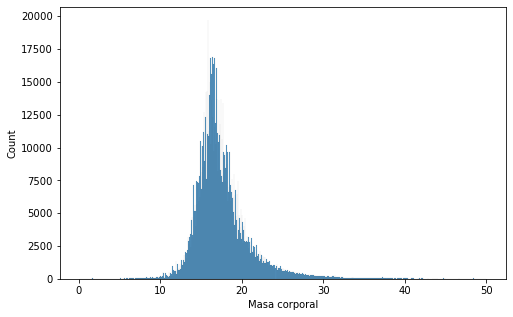

In [1072]:
fig, axs = plt.subplots(figsize = (8, 5))
sns.histplot(x = 'masa_corporal', data=df[df['masa_corporal']<50])
axs.set_xlabel('Masa corporal')
#plt.savefig('images/hist_masa_corporal.png')
plt.show()

#### HAZ

In [1030]:
# ejemplo - debería estar entre -2 y -3 
calculator.lhfa(measurement=df.loc[30]['talla'], age_in_months=str(df.loc[30]['edad_meses']), sex=df.loc[30]['sexo'])

Decimal('-2.54')

In [1031]:
df.loc[30]

id_individuo         9
sexo                 F
peso               8.1
talla             64.0
edad_dias        292.0
edad_meses         9.6
masa_corporal    19.78
Name: 30, dtype: object

In [1086]:
df_haz = df.dropna(subset=['sexo', 'edad_meses', 'talla'])

In [1087]:
def get_haz(talla, edad_meses, sexo):
    haz = calculator.lhfa(measurement=talla, age_in_months=edad_meses, sex=sexo)
    return haz

In [1088]:
df_haz['haz'] = df_haz.apply(lambda d: float(get_haz(d['talla'], d['edad_meses'], d['sexo'])), axis =1)

In [1089]:
df_haz.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61


In [1090]:
df_haz.shape[0]

1159781

In [1091]:
df.shape[0]

1159781

In [1092]:
# finalmente voy a querer hacer un join con el df original
df_final = df.merge(df_haz, on=['id_individuo', 'sexo', 'peso', 'talla', 'edad_dias', 'edad_meses', 'masa_corporal'], how='left')
df_final.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61


In [1093]:
df_final.shape[0]

1159781

#### WAZ

In [1094]:
# ejemplo 
calculator.wfa(measurement=df.loc[30]['peso'], age_in_months=str(df.loc[30]['edad_meses']), sex=df.loc[30]['sexo'])

Decimal('-0.13')

In [1095]:
df_waz = df.dropna(subset=['sexo', 'edad_meses', 'peso'])
df_waz = df_waz[df_waz['peso']>0] # tiene que ser mayor a 0 para que pueda hacer el cálculo

In [1096]:
def get_waz(peso, edad_meses, sexo):
    waz = calculator.wfa(measurement=peso, age_in_months=edad_meses, sex=sexo)
    return waz

In [1097]:
df_waz['waz'] = df_waz.apply(lambda d: float(get_waz(d['peso'], d['edad_meses'], d['sexo'])), axis =1)

In [1098]:
df_waz.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,waz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-0.07
1,1,F,23.5,115.0,2615.0,85.7,17.77,0.11
2,2,M,7.8,59.0,168.0,5.5,22.41,0.34
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.16
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.38


In [1099]:
df_waz.shape[0]

1159781

In [1100]:
df.shape[0]

1159781

In [1101]:
# finalmente voy a querer hacer un join con el df original
df_final = df_final.merge(df_waz, on=['id_individuo', 'sexo', 'peso', 'talla', 'edad_dias', 'edad_meses', 'masa_corporal'], how='left')
df_final.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33,-0.07
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36,0.11
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27,0.34
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76,-0.16
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61,0.38


In [1102]:
df_final.shape[0]

1159781

#### BMIZ

In [1103]:
# ejemplo 
float(calculator.bmifa(measurement=df.loc[30]['masa_corporal'], age_in_months=str(df.loc[30]['edad_meses']), sex=df.loc[30]['sexo']))

1.83

In [1104]:
df_bmiz = df.dropna(subset=['sexo', 'edad_meses', 'masa_corporal'])
df_bmiz = df_bmiz[df_bmiz['masa_corporal']>0] # tiene que ser mayor a 0 para que pueda hacer el cálculo

In [1105]:
def get_bmiz(masa_corporal, edad_meses, sexo):
    bmiz = calculator.bmifa(measurement=masa_corporal, age_in_months=edad_meses, sex=sexo)
    return bmiz

In [1106]:
df_bmiz['bmiz'] = df_bmiz.apply(lambda d: float(get_bmiz(d['masa_corporal'], d['edad_meses'], d['sexo'])), axis =1)

In [1107]:
df_bmiz.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,bmiz
0,1,F,18.6,104.0,1964.0,64.4,17.20,1.19
1,1,F,23.5,115.0,2615.0,85.7,17.77,1.07
2,2,M,7.8,59.0,168.0,5.5,22.41,3.07
3,2,M,7.8,66.0,193.0,6.3,17.91,0.39
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.28


In [1108]:
df_bmiz.shape[0]

1159781

In [1109]:
df.shape[0]

1159781

In [1110]:
# finalmente voy a querer hacer un join con el df original
df_final = df_final.merge(df_bmiz, on=['id_individuo', 'sexo', 'peso', 'talla', 'edad_dias', 'edad_meses', 'masa_corporal'], how='left')
df_final.head()

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
0,1,F,18.6,104.0,1964.0,64.4,17.20,-1.33,-0.07,1.19
1,1,F,23.5,115.0,2615.0,85.7,17.77,-1.36,0.11,1.07
2,2,M,7.8,59.0,168.0,5.5,22.41,-3.27,0.34,3.07
3,2,M,7.8,66.0,193.0,6.3,17.91,-0.76,-0.16,0.39
4,3,F,34.6,141.0,3573.0,117.1,17.40,0.61,0.38,0.28


In [1111]:
df_final.shape[0]

1159781

In [1112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159781 entries, 0 to 1159780
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id_individuo   1159781 non-null  int64  
 1   sexo           1159781 non-null  object 
 2   peso           1159781 non-null  float64
 3   talla          1159781 non-null  float64
 4   edad_dias      1159781 non-null  float64
 5   edad_meses     1159781 non-null  float64
 6   masa_corporal  1159781 non-null  float64
 7   haz            1159781 non-null  float64
 8   waz            1159781 non-null  float64
 9   bmiz           1159781 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 97.3+ MB


In [1156]:
df_final.sample(5, random_state=15).head(5)

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
1076679,278547,M,11.3,82.0,612.0,20.1,16.81,-0.78,-0.04,0.64
357129,92462,M,64.3,171.0,4838.0,158.6,21.99,1.67,1.47,1.04
1032763,267185,F,9.5,72.0,366.0,12.0,18.33,-0.78,0.48,1.27
391808,101488,M,24.3,117.0,2314.0,75.9,17.75,-0.05,0.85,1.33
1133283,293132,F,30.9,133.0,2956.0,96.9,17.47,0.86,0.96,0.74


In [1157]:
# extraer imagen
df_sample = df_final.sample(5, random_state=15).head(5).reset_index(drop=True)
dfi.export(df_sample, 'images/data_zscores_5.png')

In [1113]:
# guardarlo
#df_final.to_csv('data/df_zscores.csv', index=False)

## Análisis Z-scores

In [232]:
df_final = pd.read_csv('data/df_zscores.csv')

In [1114]:
df_final = df_final[df_final['masa_corporal']<50]

#### BMIZ

In [1118]:
df_final.describe()['bmiz']

count    1.150504e+06
mean    -4.115610e+00
std      4.106045e+03
min     -4.401457e+06
25%     -2.100000e-01
50%      5.100000e-01
75%      1.300000e+00
max      1.838000e+01
Name: bmiz, dtype: float64

In [1116]:
df_final['bmiz'].max()

18.38

In [1117]:
df_final['bmiz'].min()

-4401456.97

In [241]:
df_final[df_final['bmiz']==(-4401456.97)]

,id_individuo,sexo,peso,talla,edad_dias,edad_meses,masa_corporal,haz,waz,bmiz
597316,154448,F,0.3,116.0,2013.0,66.0,0.22,0.89,-1249.47,-4401456.97


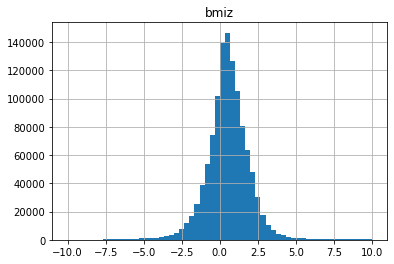

In [1124]:
bmiz_fig = df_final[(df_final['bmiz']>-10) & (df_final['bmiz']<10)].hist('bmiz', bins=60)
#plt.savefig('images/bmiz.png')

### HAZ

In [1125]:
df_final['haz'].describe()

count    1.150504e+06
mean    -3.096416e-01
std      1.954771e+00
min     -4.405000e+01
25%     -1.110000e+00
50%     -3.200000e-01
75%      5.000000e-01
max      7.275000e+01
Name: haz, dtype: float64

In [1126]:
df_final['haz'].min()

-44.05

In [1127]:
df_final['haz'].max()

72.75

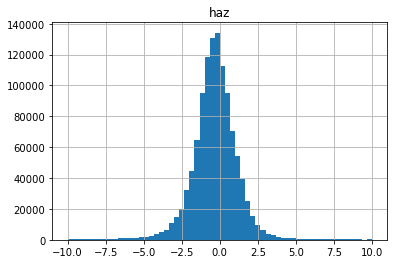

In [1130]:
haz_fig = df_final[(df_final['haz']>-10) & (df_final['haz']<10)].hist('haz', bins = 60)
#plt.savefig('images/haz.png')

### WAZ

In [1131]:
df_final['waz'].describe()

count    1.150504e+06
mean     6.799696e-02
std      2.498243e+00
min     -1.249470e+03
25%     -6.100000e-01
50%      1.100000e-01
75%      9.000000e-01
max      3.185000e+01
Name: waz, dtype: float64

In [1133]:
df_final['waz'].min()

-1249.47

In [1134]:
df_final['waz'].max()

31.85

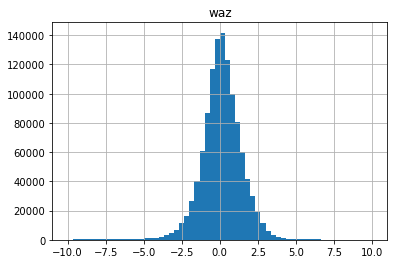

In [1135]:
waz_fig = df_final[(df_final['waz']>-10) & (df_final['waz']<10)].hist('waz', bins = 60)
#plt.savefig('images/waz.png')